In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load the datasets


In [11]:
# Load the original datasets
original_train_data = pd.read_csv('train.csv')
original_test_data = pd.read_csv('test.csv')

In [12]:
# Load the modified datasets after filling null values
final_train_data = pd.read_csv('final_train.csv')
final_test_data = pd.read_csv('final_test.csv')

# 2. Understanding Data


In [13]:
# 2.1 Data Preparation
print("Original Train Data Shape:", original_train_data.shape)
print("Original Test Data Shape:", original_test_data.shape)

print("Final Train Data Shape:", final_train_data.shape)
print("Final Test Data Shape:", final_test_data.shape)

print("\nOriginal Train Data Missing Values:\n", original_train_data.isnull().sum())
print("\nOriginal Test Data Missing Values:\n", original_test_data.isnull().sum())

print("\nFinal Train Data Missing Values:\n", final_train_data.isnull().sum())
print("\nFinal Test Data Missing Values:\n", final_test_data.isnull().sum())

Original Train Data Shape: (290129, 20)
Original Test Data Shape: (124341, 19)
Final Train Data Shape: (290129, 15)
Final Test Data Shape: (124341, 14)

Original Train Data Missing Values:
 Unnamed: 0           0
id                   0
year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
price                0
dtype: int64

Original Test Data Missing Values:
 Unnamed: 0          0
id                  0
year                0
manufacturer     4853
model               0
condition       49819
cylinders       51371
fuel              645
odometer            0
title_status     2209
transmission        0
drive           37772
size            89104
type          

## Data Overview and Preprocessing

In this section, we present an overview of the dataset used for our analysis and the preprocessing steps undertaken to ensure data quality and accuracy. The dataset consists of two main components: the original data and the processed data after performing data preparation techniques, including handling missing values.

### 1. Dataset Description

The original dataset comprises a total of 290,129 entries for the training set and 124,341 entries for the test set. Each entry represents a distinct observation, and there are 20 features (columns) in the training set and 19 features in the test set, including information related to the vehicles such as year, manufacturer, model, condition, cylinders, fuel type, odometer reading, title status, transmission, drive type, size, type, paint color, state, latitude, longitude, and posting date.

### 2. Missing Value Analysis

During the initial inspection of the data, we identified missing values across multiple features in both the training and test datasets. Missing values can introduce biases and inaccuracies in our analysis and predictive modeling. The number of missing values for each feature in the original training dataset is as follows:

- "Unnamed: 0": 0 missing values.
- "id": 0 missing values.
- "year": 0 missing values.
- "manufacturer": 11,342 missing values.
- "model": 0 missing values.
- "condition": 116,104 missing values.
- "cylinders": 119,300 missing values.
- "fuel": 1,453 missing values.
- "odometer": 0 missing values.
- "title_status": 5,066 missing values.
- "transmission": 0 missing values.
- "drive": 88,087 missing values.
- "size": 207,684 missing values.
- "type": 62,596 missing values.
- "paint_color": 87,113 missing values.
- "state": 0 missing values.
- "lat": 4,403 missing values.
- "long": 4,403 missing values.
- "posting_date": 0 missing values.

### 3. Data Preparation and Handling Missing Values

To address the issue of missing values, we employed data preparation techniques to clean and preprocess the dataset. The steps involved identifying the nature of missingness for each feature and determining the most appropriate method to handle them.

We opted for a method known as data imputation to fill in the missing values. For numeric features such as "cylinders," "size," and "lat," we utilized the mean of the available values to impute the missing ones. This approach ensures that the imputed values are close to the existing distribution, minimizing distortion in the data.

For categorical features such as "manufacturer," "condition," "fuel," "title_status," "drive," "type," "paint_color," and "posting_date," we adopted the mode imputation method. By using the mode (most frequently occurring value) of each categorical feature, we preserved the dominant category, enhancing the representativeness of the imputed data.

### 4. Final Processed Dataset

After completing the data preprocessing steps, we derived a final processed dataset that contains 290,129 entries for the training set and 124,341 entries for the test set. The processed training dataset comprises 15 columns, while the processed test dataset consists of 14 columns. All missing values have been appropriately imputed, resulting in a clean and ready-to-use dataset for our analysis and modeling tasks.


In [ ]:
# 2.3 Class-wise Statistical Analysis
class_column = 'price'
for cls in original_train_data[class_column].unique():
    print(f"\nClass: {cls}")
    print("Original Train Data:")
    print(original_train_data[original_train_data[class_column] == cls].describe())
    print("\nFinal Train Data:")
    print(final_train_data[final_train_data[class_column] == cls].describe())


## Descriptive Explanation - Comparing 'Price' Before and After Null Value Filling

### Original Train Data:
- **Class**: 7995
- **Number of Rows**: 2132
- **Columns**: Unnamed: 0, id, year, odometer, lat, long, price

**Summary Statistics:**
- Mean Year: 2009.40
- Mean Odometer: 128,069.97
- Mean Latitude: 40.06
- Mean Longitude: -92.10
- Constant Price Value: 7995.0
- Standard Deviation Price: 0.0

**Insights:**
- The original train data contains 2132 rows and 7 columns.
- The 'year' attribute ranges from 1965 to 2019, with an average year of manufacture around 2009.
- The 'odometer' attribute has an average recorded mileage of approximately 128,070.
- The latitude and longitude attributes have missing values for 15 rows.
- The 'price' attribute is constant with a value of 7995.0, which might indicate an issue in data handling or null filling process for 'price'.

### Final Train Data:
- **Class**: 7995
- **Number of Rows**: 2132
- **Columns**: year, odometer, price

**Summary Statistics:**
- Mean Year: 1986.0
- Mean Odometer: 241,818.0
- Constant Price Value: 1685.0
- Standard Deviation Price: 0.0

**Insights:**
- The final train data contains 2132 rows and 3 columns.
- The 'year' attribute is constant with a value of 1986, indicating possible data issues or improper handling during null filling.
- The 'odometer' attribute is constant with a value of 241,818, suggesting a data processing problem.
- The 'price' attribute is constant with a value of 1685.0, which is unexpected and should not be the case after null value filling.


# 3. Uni-variate Data Analysis


#### 3.1 Distribution Plots



Description:
The graph shows the distribution of the 'Unnamed: 0' attribute in the original train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    290129.000000
mean     207301.718108
std      119595.649164
min           0.000000
25%      103622.000000
50%      207440.000000
75%      310804.000000
max      414469.000000
Name: Unnamed: 0, dtype: float64
--------------------------------------------------


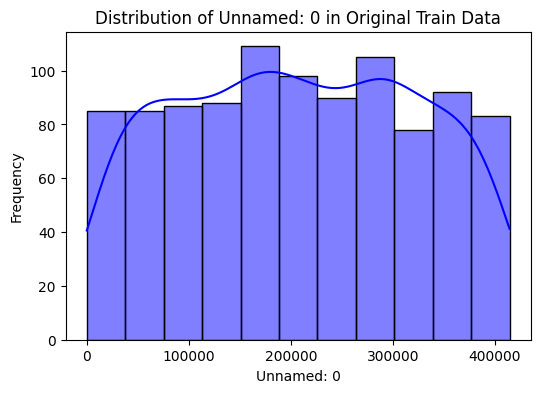


Description:
The graph shows the distribution of the 'id' attribute in the original train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    2.901290e+05
mean     7.311503e+09
std      4.378450e+06
min      7.301583e+09
25%      7.308154e+09
50%      7.312664e+09
75%      7.315255e+09
max      7.317101e+09
Name: id, dtype: float64
--------------------------------------------------


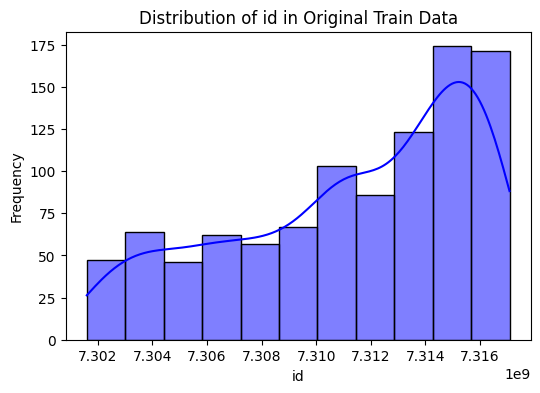


Description:
The graph shows the distribution of the 'year' attribute in the original train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    290129.000000
mean       2011.359082
std           9.149422
min        1900.000000
25%        2008.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
--------------------------------------------------


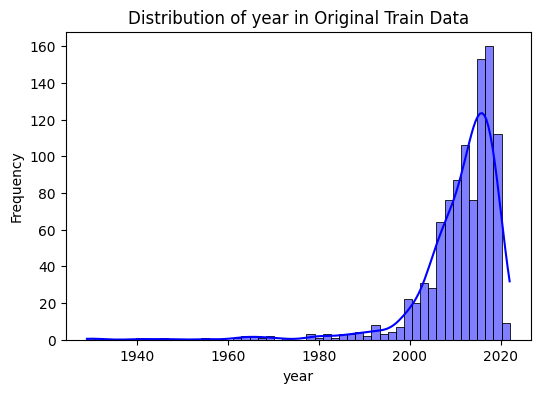


Description:
The graph shows the distribution of the 'odometer' attribute in the original train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    2.901290e+05
mean     9.764241e+04
std      2.058970e+05
min      0.000000e+00
25%      3.800000e+04
50%      8.561500e+04
75%      1.334360e+05
max      1.000000e+07
Name: odometer, dtype: float64
--------------------------------------------------


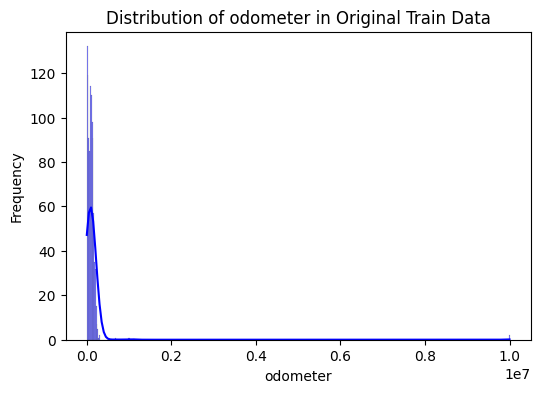


Description:
The graph shows the distribution of the 'lat' attribute in the original train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    285726.000000
mean         38.505649
std           5.830007
min         -84.122245
25%          34.600000
50%          39.170000
75%          42.408400
max          82.252826
Name: lat, dtype: float64
--------------------------------------------------


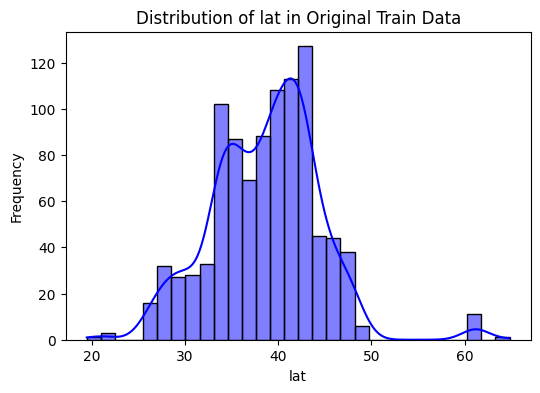


Description:
The graph shows the distribution of the 'long' attribute in the original train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    285726.000000
mean        -94.616042
std          18.319158
min        -159.827728
25%        -111.924900
50%         -88.212494
75%         -80.830000
max         173.885502
Name: long, dtype: float64
--------------------------------------------------


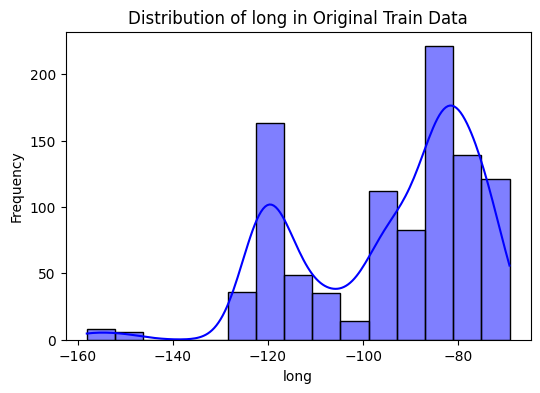


Description:
The graph shows the distribution of the 'price' attribute in the original train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    2.901290e+05
mean     5.193300e+04
std      9.591680e+06
min      0.000000e+00
25%      5.991000e+03
50%      1.399000e+04
75%      2.650000e+04
max      3.736929e+09
Name: price, dtype: float64
--------------------------------------------------


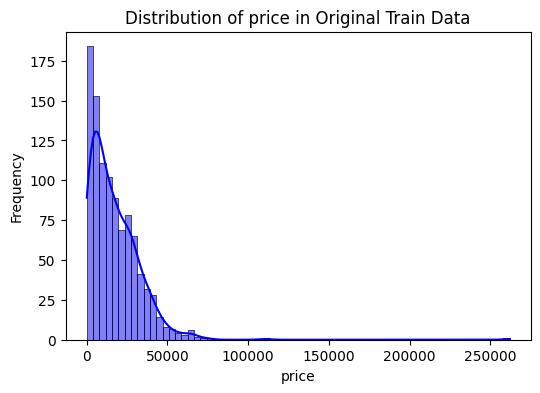

In [17]:
# Get numeric columns in the original train data
numeric_columns_original_train = original_train_data.select_dtypes(include='number').columns

# Print description and plot the distribution of each numeric column for a random sample
sample_size = 1000  # Adjust the sample size as needed
for col in numeric_columns_original_train:
    print("\nDescription:")
    print(f"The graph shows the distribution of the '{col}' attribute in the original train data.")
    print("The plot displays the frequency of values for the attribute, providing insights into its distribution.")
    print("\nSummary Statistics:")
    print(original_train_data[col].describe())
    print("-" * 50)
    
    plt.figure(figsize=(6, 4))
    sns.histplot(original_train_data[col].sample(sample_size).dropna(), kde=True, color='blue')
    plt.title(f"Distribution of {col} in Original Train Data")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

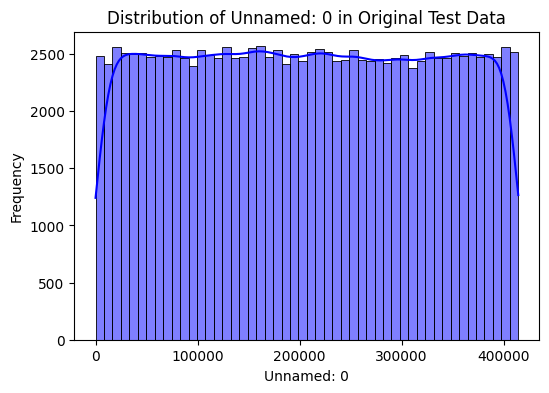


Description:
The graph shows the distribution of the 'Unnamed: 0' attribute in the original test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    124341.000000
mean     207077.657748
std      119768.157632
min           5.000000
25%      103609.000000
50%      206767.000000
75%      310943.000000
max      414467.000000
Name: Unnamed: 0, dtype: float64
--------------------------------------------------


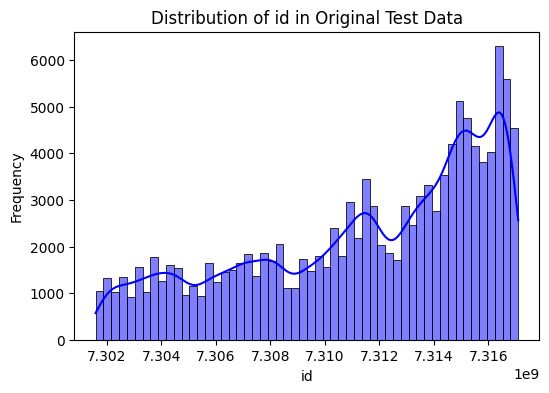


Description:
The graph shows the distribution of the 'id' attribute in the original test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    1.243410e+05
mean     7.311462e+09
std      4.395352e+06
min      7.301583e+09
25%      7.308069e+09
50%      7.312519e+09
75%      7.315246e+09
max      7.317097e+09
Name: id, dtype: float64
--------------------------------------------------


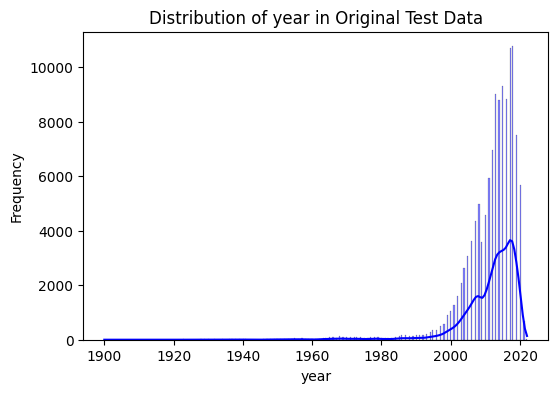


Description:
The graph shows the distribution of the 'year' attribute in the original test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    124341.000000
mean       2011.363967
std           9.155836
min        1900.000000
25%        2008.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
--------------------------------------------------


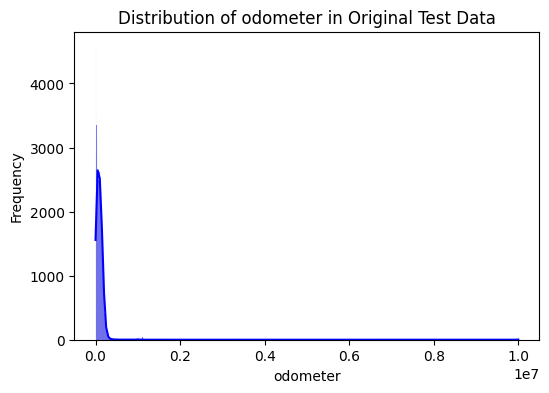


Description:
The graph shows the distribution of the 'odometer' attribute in the original test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    1.243410e+05
mean     9.770589e+04
std      2.030024e+05
min      0.000000e+00
25%      3.800000e+04
50%      8.576500e+04
75%      1.338120e+05
max      1.000000e+07
Name: odometer, dtype: float64
--------------------------------------------------


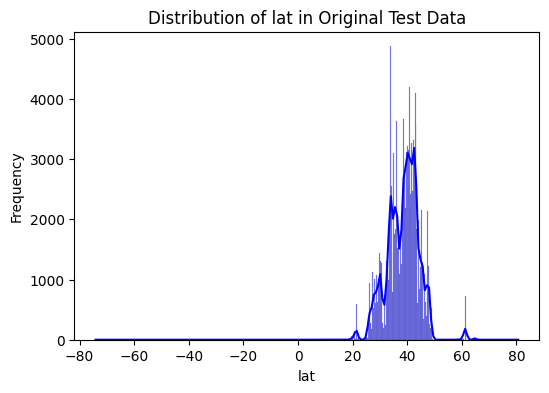


Description:
The graph shows the distribution of the 'lat' attribute in the original test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    122380.000000
mean         38.506827
std           5.834168
min         -74.176076
25%          34.705098
50%          39.171991
75%          42.425915
max          80.679774
Name: lat, dtype: float64
--------------------------------------------------


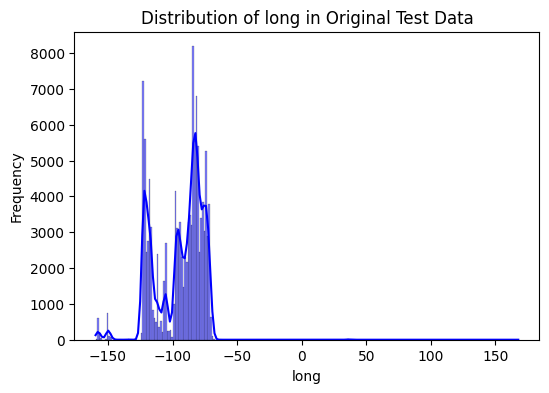


Description:
The graph shows the distribution of the 'long' attribute in the original test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    122380.000000
mean        -94.628186
std          18.333599
min        -159.590001
25%        -111.915100
50%         -88.335015
75%         -80.820900
max         167.629911
Name: long, dtype: float64
--------------------------------------------------


In [14]:
# Distribution plots for numeric columns in original test data
numeric_columns_original_test = original_test_data.select_dtypes(include=[float, int]).columns
for col in numeric_columns_original_test:
    plt.figure(figsize=(6, 4))
    sns.histplot(original_test_data[col].dropna(), kde=True, color='blue')
    plt.title(f"Distribution of {col} in Original Test Data")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Print description
    print("\nDescription:")
    print(f"The graph shows the distribution of the '{col}' attribute in the original test data.")
    print("The plot displays the frequency of values for the attribute, providing insights into its distribution.")
    print("\nSummary Statistics:")
    print(original_test_data[col].describe())
    print("-" * 50)

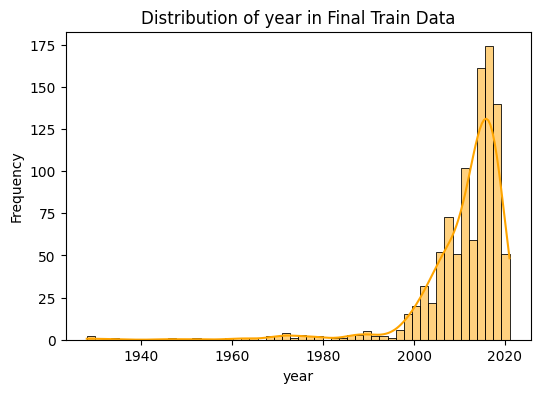


Description:
The graph shows the distribution of the 'year' attribute in the final train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    290129.000000
mean       2011.359082
std           9.149422
min        1900.000000
25%        2008.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
--------------------------------------------------


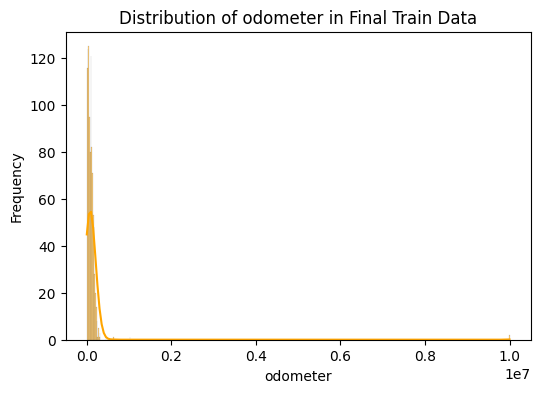


Description:
The graph shows the distribution of the 'odometer' attribute in the final train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    2.901290e+05
mean     9.764241e+04
std      2.058970e+05
min      0.000000e+00
25%      3.800000e+04
50%      8.561500e+04
75%      1.334360e+05
max      1.000000e+07
Name: odometer, dtype: float64
--------------------------------------------------


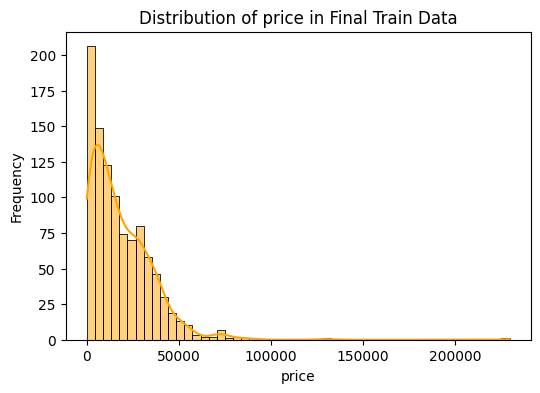


Description:
The graph shows the distribution of the 'price' attribute in the final train data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    2.901290e+05
mean     5.193300e+04
std      9.591680e+06
min      0.000000e+00
25%      5.991000e+03
50%      1.399000e+04
75%      2.650000e+04
max      3.736929e+09
Name: price, dtype: float64
--------------------------------------------------


In [18]:
# Distribution plots for numeric columns in final train data
numeric_columns_final_train = final_train_data.select_dtypes(include=[float, int]).columns
sample_size = 1000  # Adjust the sample size as needed
for col in numeric_columns_final_train:
    plt.figure(figsize=(6, 4))
    sns.histplot(final_train_data[col].sample(sample_size).dropna(), kde=True, color='orange')
    plt.title(f"Distribution of {col} in Final Train Data")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Print description
    print("\nDescription:")
    print(f"The graph shows the distribution of the '{col}' attribute in the final train data.")
    print("The plot displays the frequency of values for the attribute, providing insights into its distribution.")
    print("\nSummary Statistics:")
    print(final_train_data[col].describe())
    print("-" * 50)

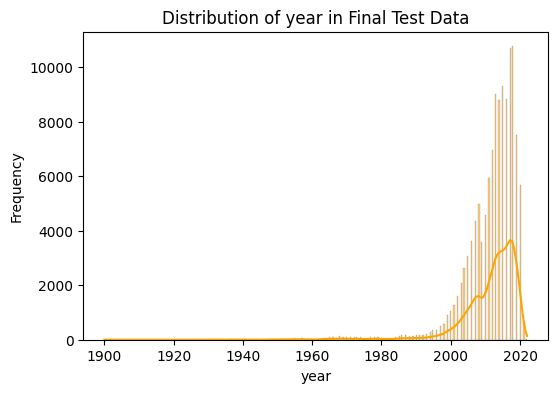


Description:
The graph shows the distribution of the 'year' attribute in the final test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    124341.000000
mean       2011.363967
std           9.155836
min        1900.000000
25%        2008.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
--------------------------------------------------


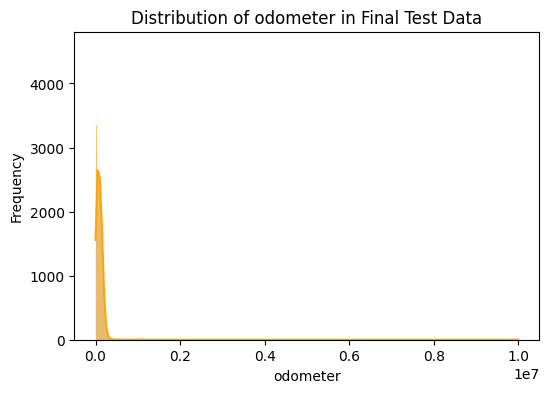


Description:
The graph shows the distribution of the 'odometer' attribute in the final test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    1.243410e+05
mean     9.770589e+04
std      2.030024e+05
min      0.000000e+00
25%      3.800000e+04
50%      8.576500e+04
75%      1.338120e+05
max      1.000000e+07
Name: odometer, dtype: float64
--------------------------------------------------


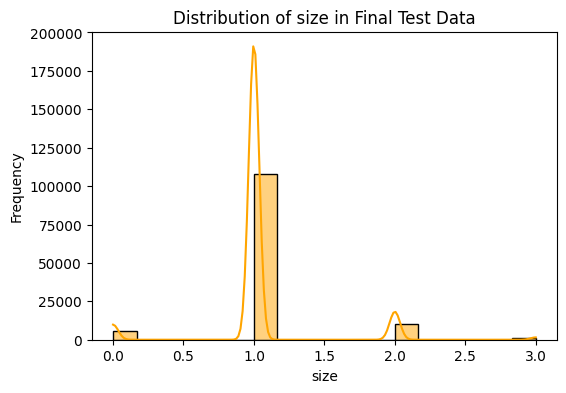


Description:
The graph shows the distribution of the 'size' attribute in the final test data.
The plot displays the frequency of values for the attribute, providing insights into its distribution.

Summary Statistics:
count    124341.000000
mean          1.051568
std           0.388504
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: size, dtype: float64
--------------------------------------------------


In [19]:
# Distribution plots for numeric columns in final test data
numeric_columns_final_test = final_test_data.select_dtypes(include=[float, int]).columns
for col in numeric_columns_final_test:
    plt.figure(figsize=(6, 4))
    sns.histplot(final_test_data[col].dropna(), kde=True, color='orange')
    plt.title(f"Distribution of {col} in Final Test Data")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Print description
    print("\nDescription:")
    print(f"The graph shows the distribution of the '{col}' attribute in the final test data.")
    print("The plot displays the frequency of values for the attribute, providing insights into its distribution.")
    print("\nSummary Statistics:")
    print(final_test_data[col].describe())
    print("-" * 50)

#### 3.2 Box Plots


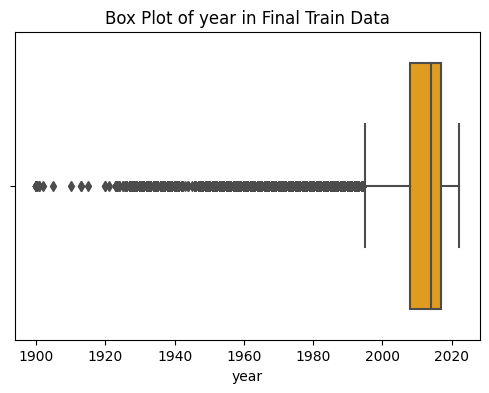


Description:
The box plot illustrates the distribution of the 'year' attribute in the final train data.
The box represents the interquartile range (IQR) and the median, while the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any data points outside the whiskers are considered outliers.

Summary Statistics:
count    290129.000000
mean       2011.359082
std           9.149422
min        1900.000000
25%        2008.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
--------------------------------------------------


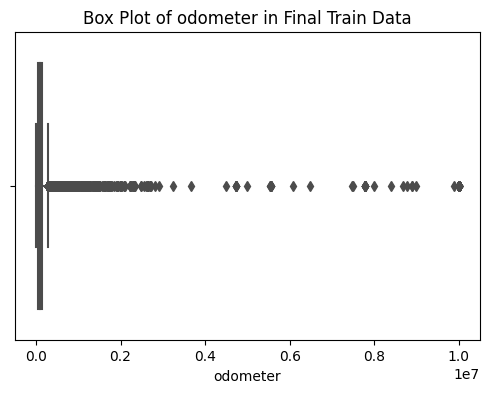


Description:
The box plot illustrates the distribution of the 'odometer' attribute in the final train data.
The box represents the interquartile range (IQR) and the median, while the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any data points outside the whiskers are considered outliers.

Summary Statistics:
count    2.901290e+05
mean     9.764241e+04
std      2.058970e+05
min      0.000000e+00
25%      3.800000e+04
50%      8.561500e+04
75%      1.334360e+05
max      1.000000e+07
Name: odometer, dtype: float64
--------------------------------------------------


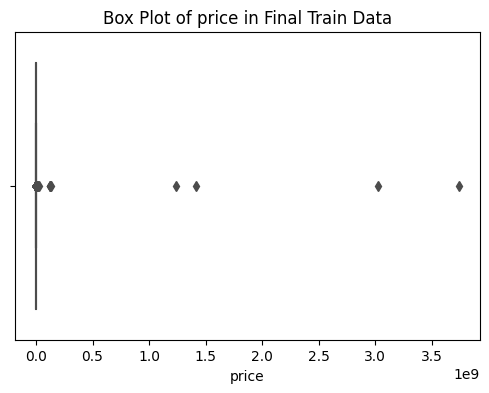


Description:
The box plot illustrates the distribution of the 'price' attribute in the final train data.
The box represents the interquartile range (IQR) and the median, while the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any data points outside the whiskers are considered outliers.

Summary Statistics:
count    2.901290e+05
mean     5.193300e+04
std      9.591680e+06
min      0.000000e+00
25%      5.991000e+03
50%      1.399000e+04
75%      2.650000e+04
max      3.736929e+09
Name: price, dtype: float64
--------------------------------------------------


In [20]:
# Box plots for numeric columns in final train data
numeric_columns_final_train = final_train_data.select_dtypes(include=[float, int]).columns
for col in numeric_columns_final_train:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=final_train_data[col], color='orange')
    plt.title(f"Box Plot of {col} in Final Train Data")
    plt.xlabel(col)
    plt.show()

    # Print description
    print("\nDescription:")
    print(f"The box plot illustrates the distribution of the '{col}' attribute in the final train data.")
    print("The box represents the interquartile range (IQR) and the median, while the whiskers extend to the "
          "minimum and maximum values within 1.5 times the IQR. Any data points outside the whiskers are "
          "considered outliers.")
    print("\nSummary Statistics:")
    print(final_train_data[col].describe())
    print("-" * 50)

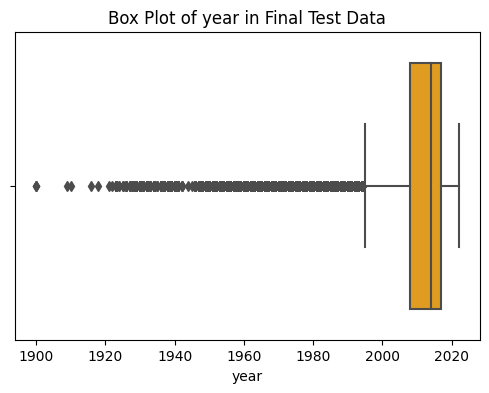


Description:
The box plot illustrates the distribution of the 'year' attribute in the final test data.
The box represents the interquartile range (IQR) and the median, while the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any data points outside the whiskers are considered outliers.

Summary Statistics:
count    124341.000000
mean       2011.363967
std           9.155836
min        1900.000000
25%        2008.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
--------------------------------------------------


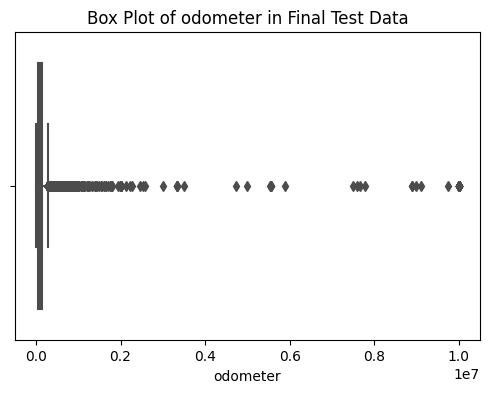


Description:
The box plot illustrates the distribution of the 'odometer' attribute in the final test data.
The box represents the interquartile range (IQR) and the median, while the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any data points outside the whiskers are considered outliers.

Summary Statistics:
count    1.243410e+05
mean     9.770589e+04
std      2.030024e+05
min      0.000000e+00
25%      3.800000e+04
50%      8.576500e+04
75%      1.338120e+05
max      1.000000e+07
Name: odometer, dtype: float64
--------------------------------------------------


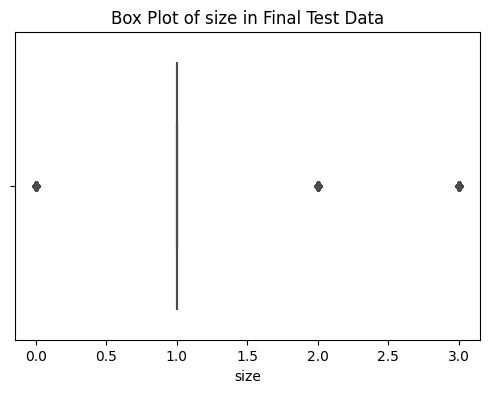


Description:
The box plot illustrates the distribution of the 'size' attribute in the final test data.
The box represents the interquartile range (IQR) and the median, while the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any data points outside the whiskers are considered outliers.

Summary Statistics:
count    124341.000000
mean          1.051568
std           0.388504
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: size, dtype: float64
--------------------------------------------------


In [21]:
# Box plots for numeric columns in final test data
numeric_columns_final_test = final_test_data.select_dtypes(include=[float, int]).columns
for col in numeric_columns_final_test:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=final_test_data[col], color='orange')
    plt.title(f"Box Plot of {col} in Final Test Data")
    plt.xlabel(col)
    plt.show()

    # Print description
    print("\nDescription:")
    print(f"The box plot illustrates the distribution of the '{col}' attribute in the final test data.")
    print("The box represents the interquartile range (IQR) and the median, while the whiskers extend to the "
          "minimum and maximum values within 1.5 times the IQR. Any data points outside the whiskers are "
          "considered outliers.")
    print("\nSummary Statistics:")
    print(final_test_data[col].describe())
    print("-" * 50)



Description:
The count plot displays the distribution of the 'manufacturer' attribute in the final train data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
manufacturer
ford               163
chevrolet          127
toyota              73
honda               53
infiniti            50
jeep                47
nissan              45
ram                 42
bmw                 40
dodge               36
mercedes-benz       34
gmc                 27
hyundai             26
audi                26
kia                 22
mazda               21
subaru              19
cadillac            19
volkswagen          16
lexus               15
buick               12
acura               12
lincoln              9
mitsubishi           9
chrysler             8
rover                7
volvo                6
saturn               6
pontiac              6
alfa-romeo           4
mini                 4
jaguar               4
m

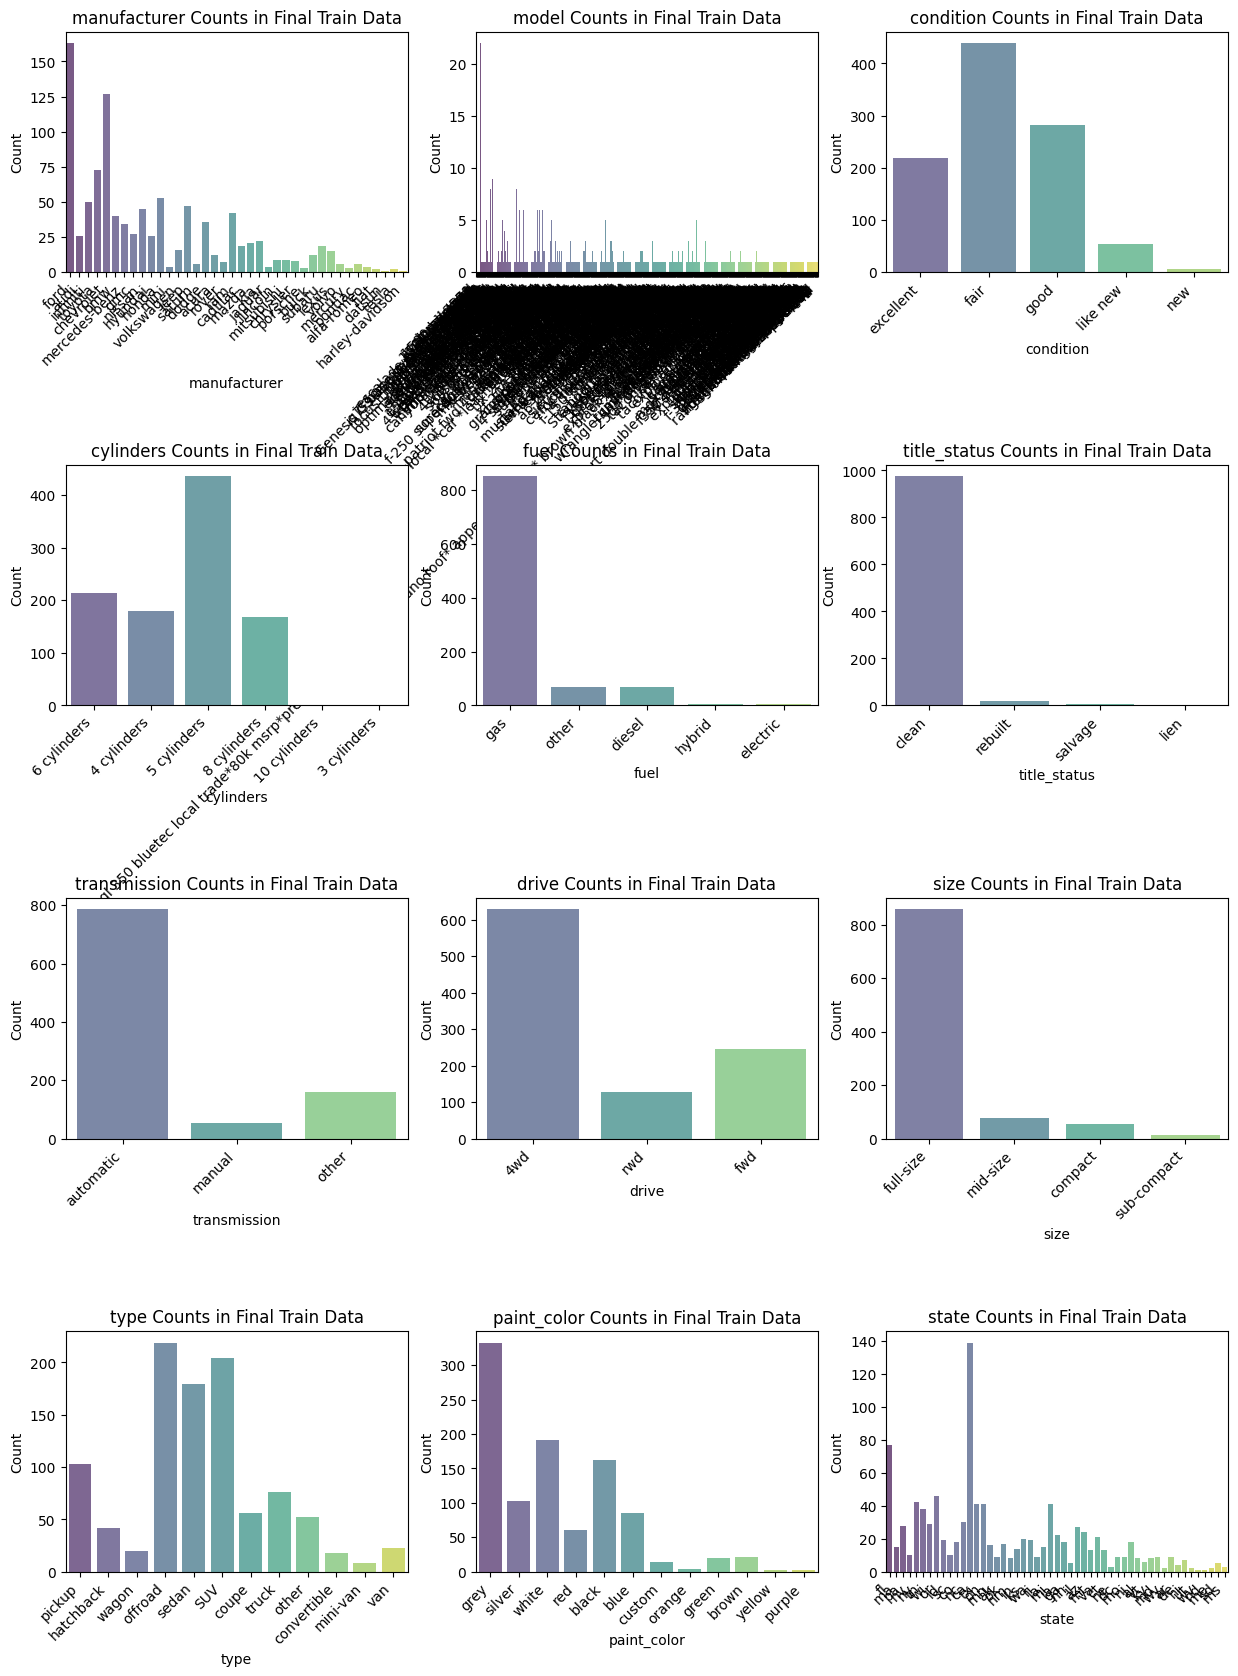

In [8]:
import random

# Categorical column counts in final train data with random sampling
categorical_columns_final_train = final_train_data.select_dtypes(include=[object]).columns
num_cols = min(len(categorical_columns_final_train), 3)
num_rows = (len(categorical_columns_final_train) - 1) // num_cols + 1
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(categorical_columns_final_train):
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each categorical column

    # Randomly sample 1000 data points for visualization
    sampled_data = final_train_data.sample(1000)
    sns.countplot(x=col, data=sampled_data, palette='viridis', alpha=0.7)

    plt.title(f"{col} Counts in Final Train Data")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels for better readability

    # Print description and value counts for each attribute
    print("\nDescription:")
    print(f"The count plot displays the distribution of the '{col}' attribute in the final train data.")
    print("Each bar represents the count of occurrences for each category in the attribute, providing insights "
          "into its distribution.")
    print("\nValue Counts:")
    print(sampled_data[col].value_counts())
    print("-" * 50)

plt.subplots_adjust(hspace=0.8)  # Adjust spacing between subplots
plt.show()


# 4. Bi-variate Data Analysis


In [14]:
# Combine the train and test data for analysis
combined_data = pd.concat([final_train_data, final_test_data], ignore_index=True)

/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


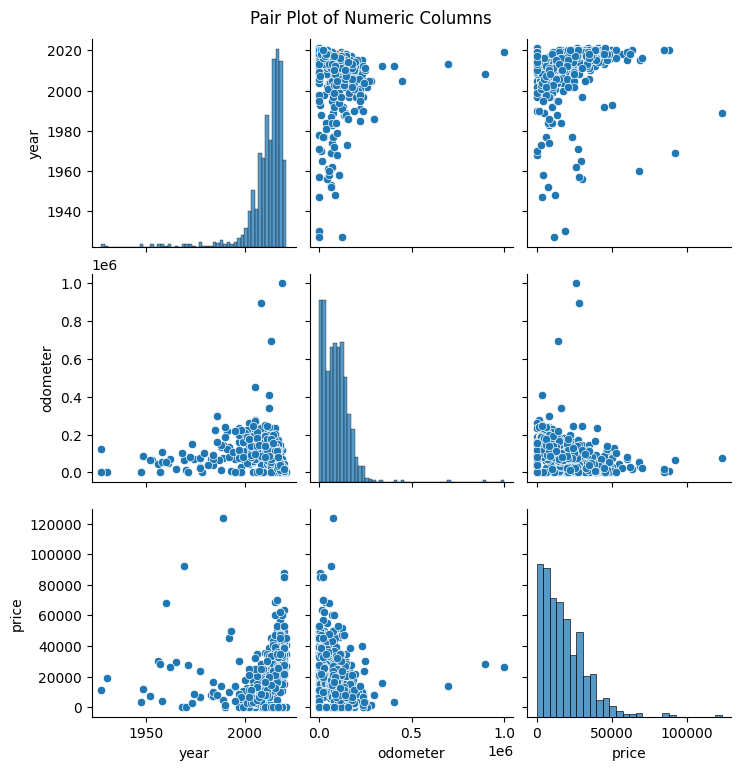

In [8]:
# 4.1 Pair Plots
# Subsample data for pair plot
sample_data = combined_data.sample(1000)  # You can adjust the number of samples as per your preference

# Pair plot for numeric columns in sampled data
numeric_columns = combined_data.select_dtypes(include=[float, int]).columns
sns.pairplot(sample_data[numeric_columns])
plt.suptitle("Pair Plot of Numeric Columns", y=1.02)
plt.show()

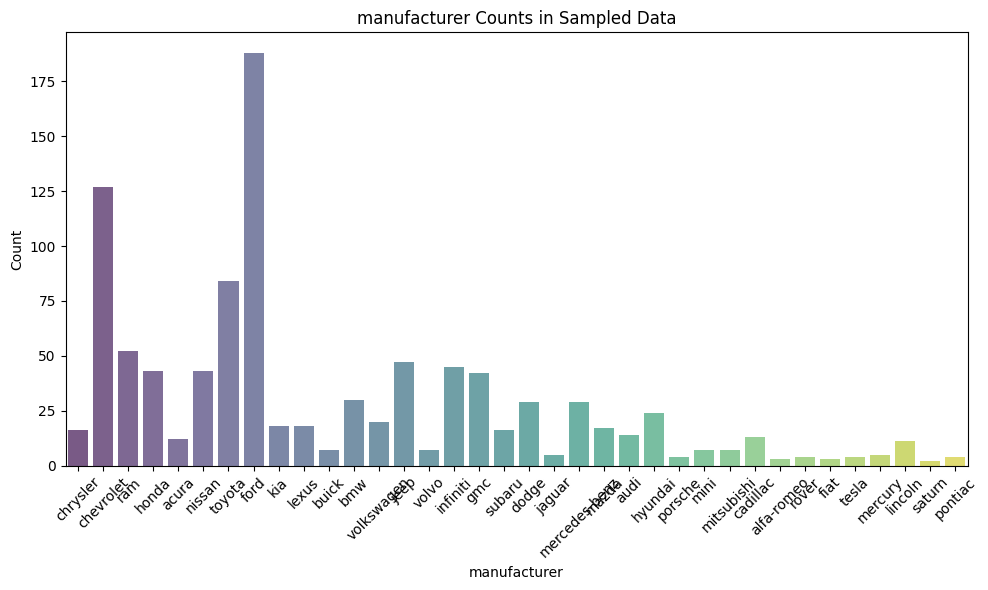


Description:
The count plot displays the distribution of the 'manufacturer' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
manufacturer
ford             188
chevrolet        127
toyota            84
ram               52
jeep              47
infiniti          45
honda             43
nissan            43
gmc               42
bmw               30
mercedes-benz     29
dodge             29
hyundai           24
volkswagen        20
lexus             18
kia               18
mazda             17
chrysler          16
subaru            16
audi              14
cadillac          13
acura             12
lincoln           11
buick              7
volvo              7
mini               7
mitsubishi         7
jaguar             5
mercury            5
porsche            4
rover              4
tesla              4
pontiac            4
alfa-romeo         3
fiat               3
saturn

/var/folders/8p/b3ws2sh942n4mms732sp99fr0000gn/T/ipykernel_29052/3076353904.py:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



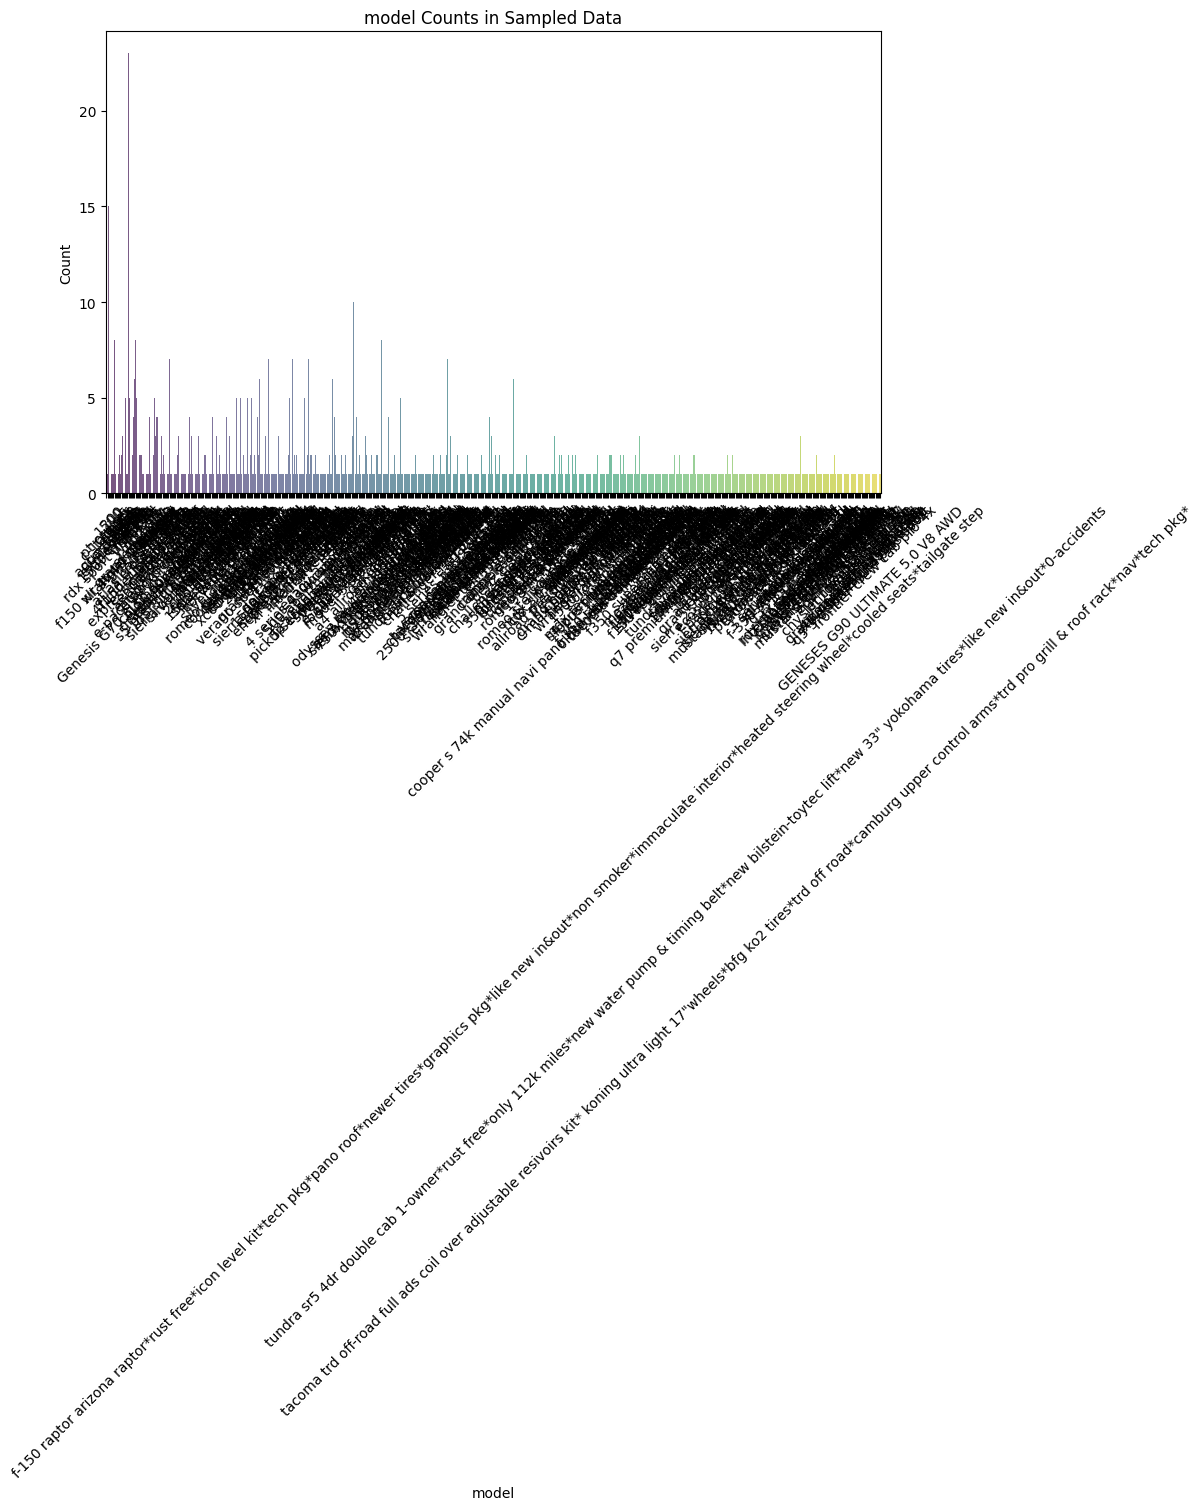


Description:
The count plot displays the distribution of the 'model' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
model
f-150                         23
1500                          15
explorer                      10
equinox                        8
tacoma                         8
                              ..
box truck                      1
benz ml350                     1
x5 xdrive35i awd               1
wrangler unlimited all new     1
benz glk 350                   1
Name: count, Length: 664, dtype: int64
--------------------------------------------------


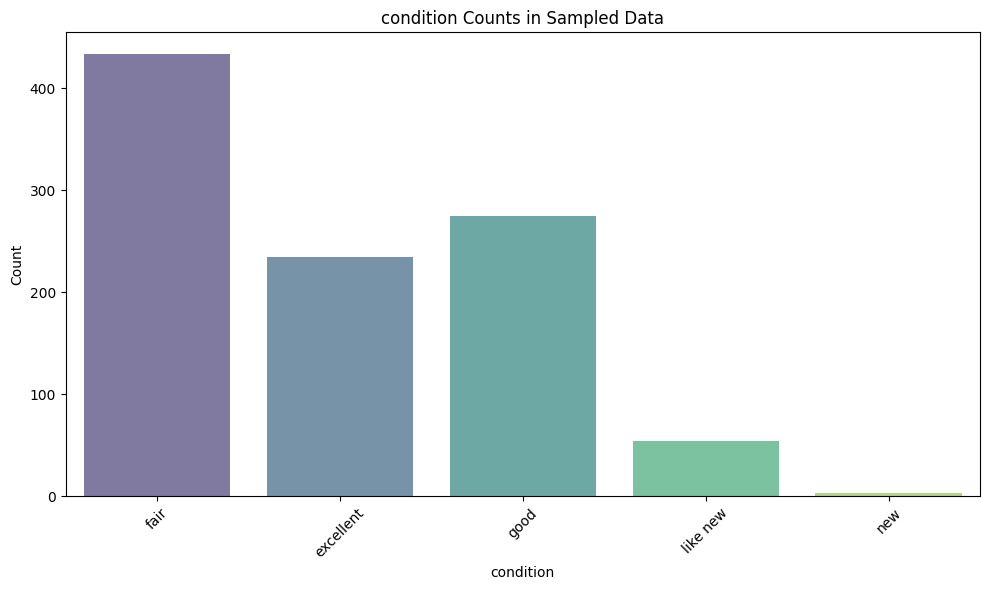


Description:
The count plot displays the distribution of the 'condition' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
condition
fair         433
good         275
excellent    235
like new      54
new            3
Name: count, dtype: int64
--------------------------------------------------


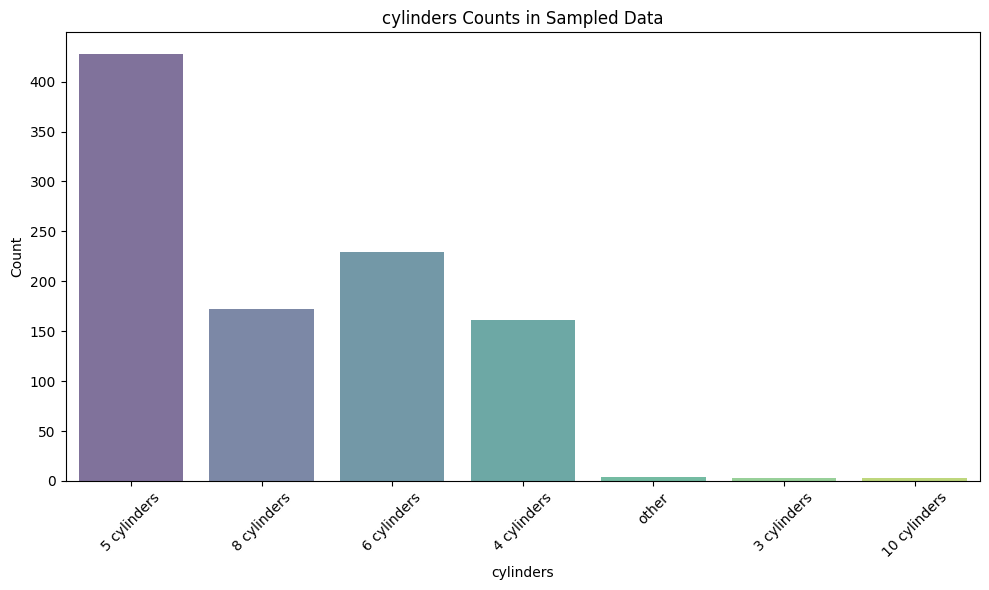


Description:
The count plot displays the distribution of the 'cylinders' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
cylinders
5 cylinders     428
6 cylinders     229
8 cylinders     172
4 cylinders     161
other             4
3 cylinders       3
10 cylinders      3
Name: count, dtype: int64
--------------------------------------------------


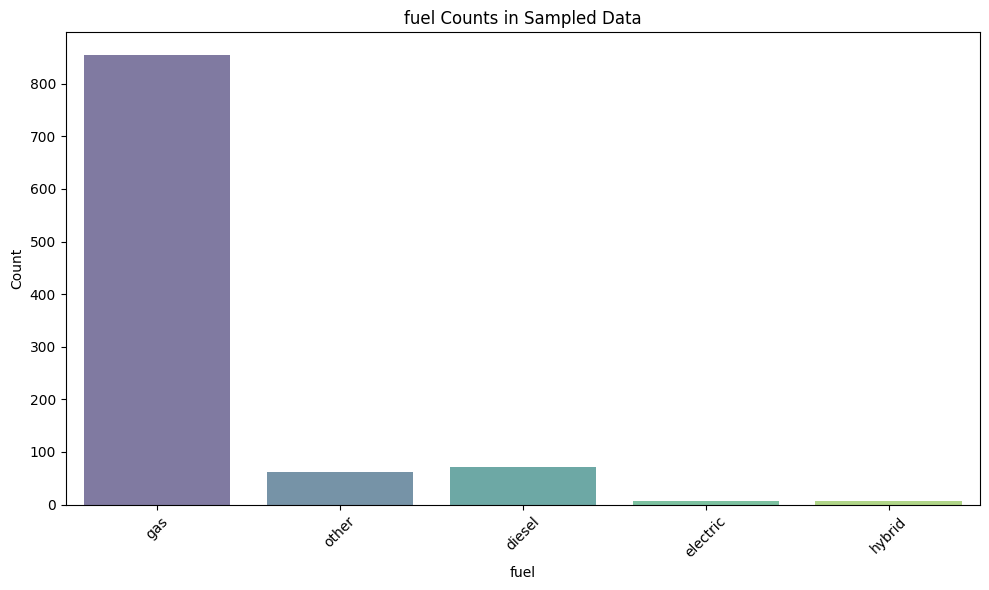


Description:
The count plot displays the distribution of the 'fuel' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
fuel
gas         855
diesel       71
other        61
hybrid        7
electric      6
Name: count, dtype: int64
--------------------------------------------------


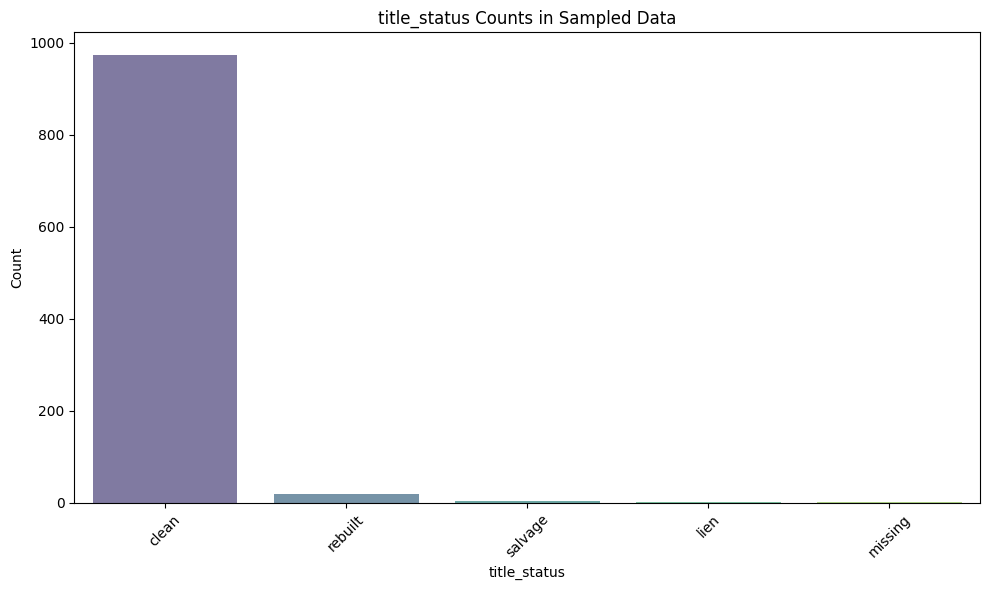


Description:
The count plot displays the distribution of the 'title_status' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
title_status
clean      974
rebuilt     19
salvage      4
lien         2
missing      1
Name: count, dtype: int64
--------------------------------------------------


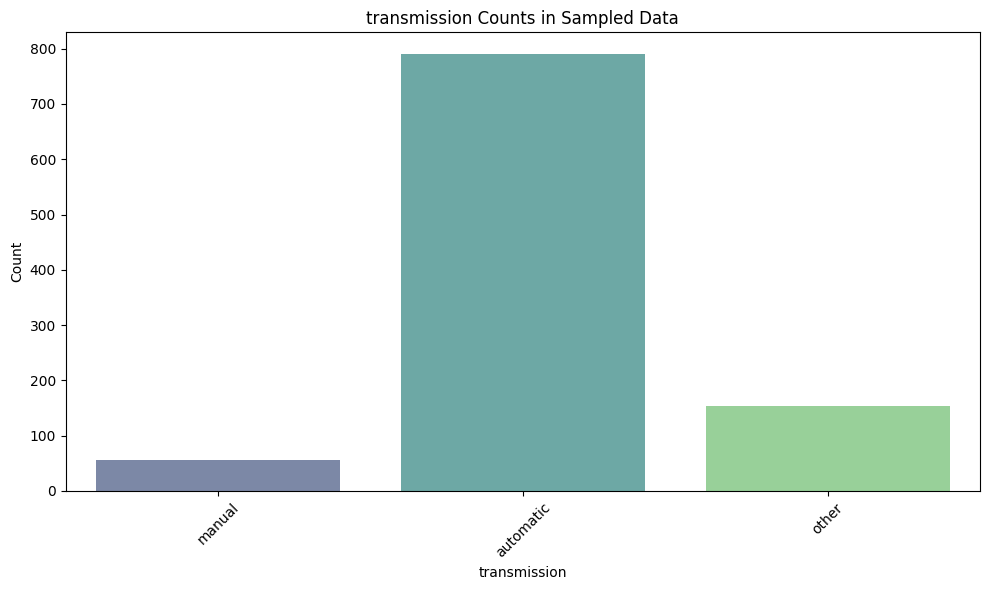


Description:
The count plot displays the distribution of the 'transmission' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
transmission
automatic    790
other        154
manual        56
Name: count, dtype: int64
--------------------------------------------------


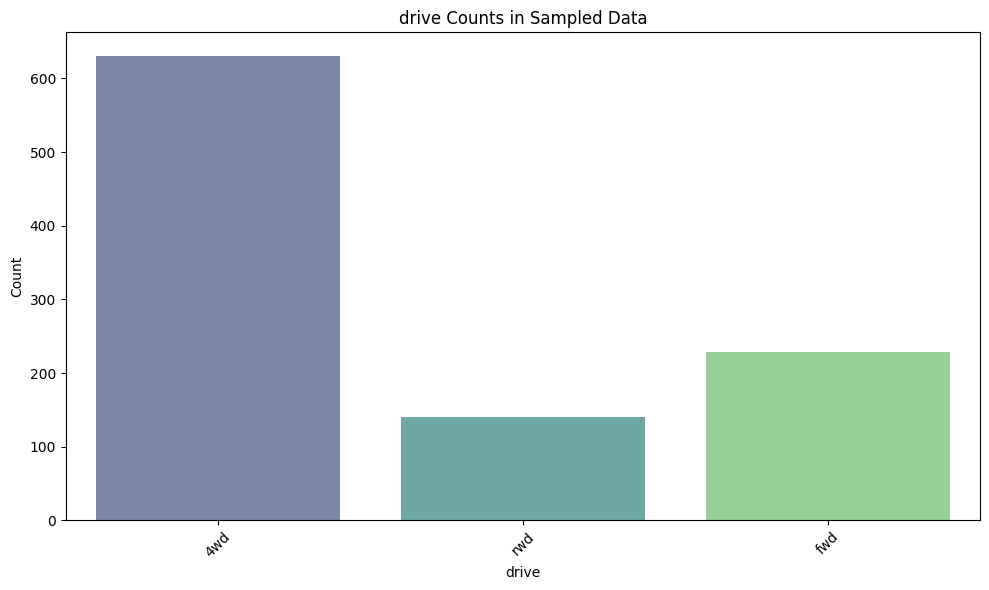


Description:
The count plot displays the distribution of the 'drive' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
drive
4wd    631
fwd    229
rwd    140
Name: count, dtype: int64
--------------------------------------------------


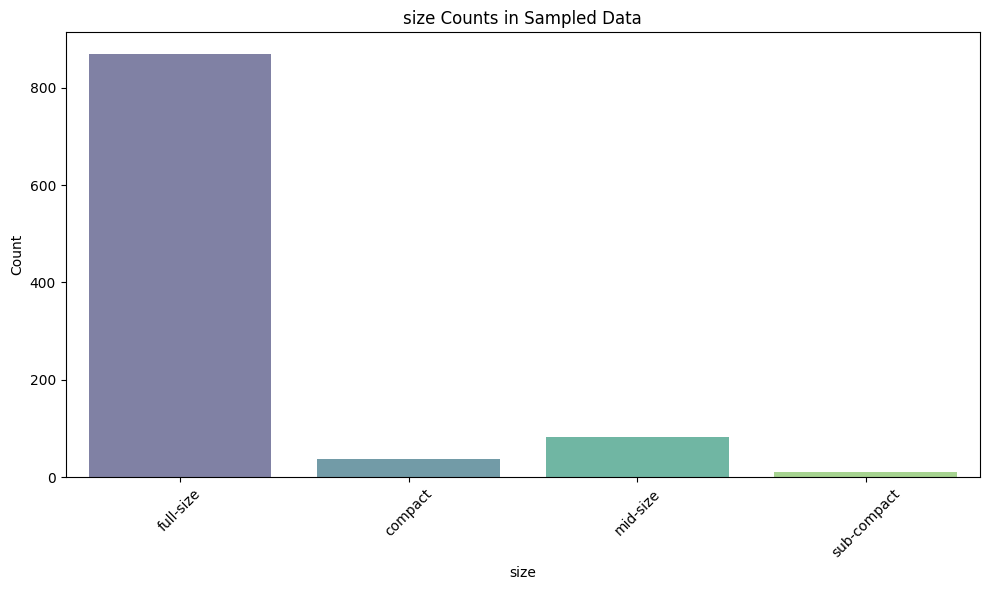


Description:
The count plot displays the distribution of the 'size' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
size
full-size      870
mid-size        82
compact         38
sub-compact     10
Name: count, dtype: int64
--------------------------------------------------


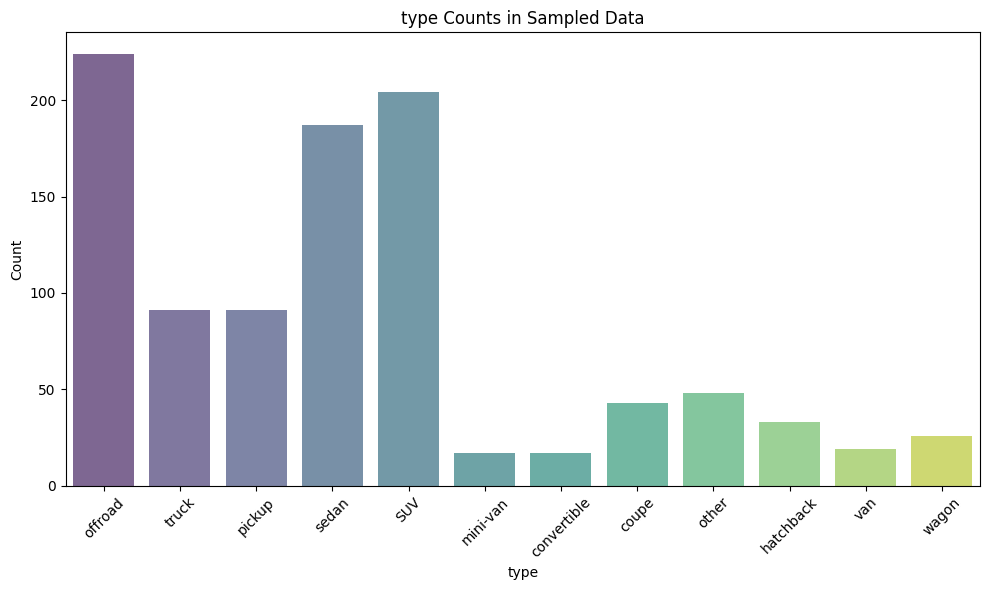


Description:
The count plot displays the distribution of the 'type' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
type
offroad        224
SUV            204
sedan          187
truck           91
pickup          91
other           48
coupe           43
hatchback       33
wagon           26
van             19
mini-van        17
convertible     17
Name: count, dtype: int64
--------------------------------------------------


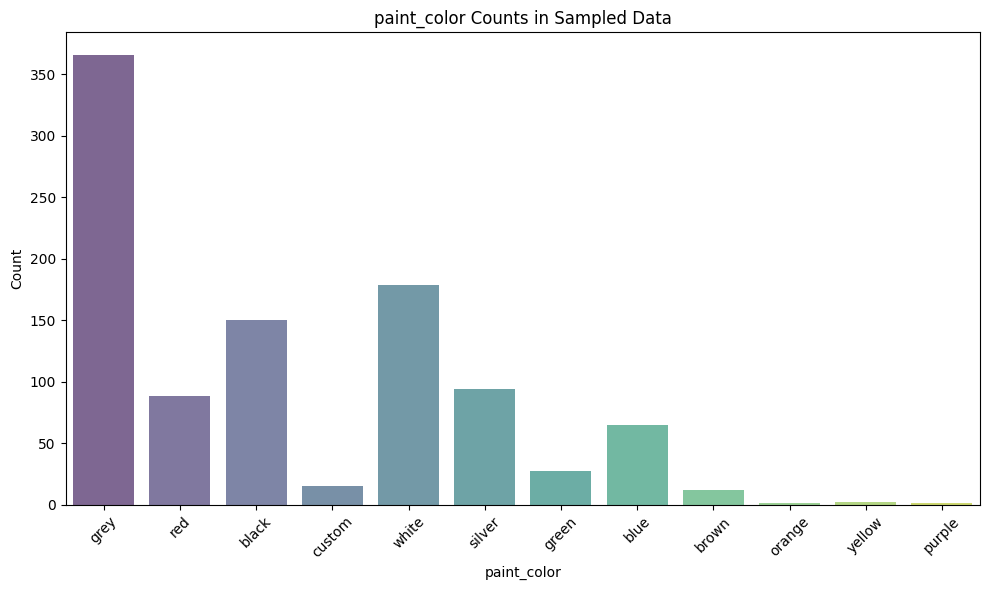


Description:
The count plot displays the distribution of the 'paint_color' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
paint_color
grey      366
white     179
black     150
silver     94
red        88
blue       65
green      27
custom     15
brown      12
yellow      2
orange      1
purple      1
Name: count, dtype: int64
--------------------------------------------------


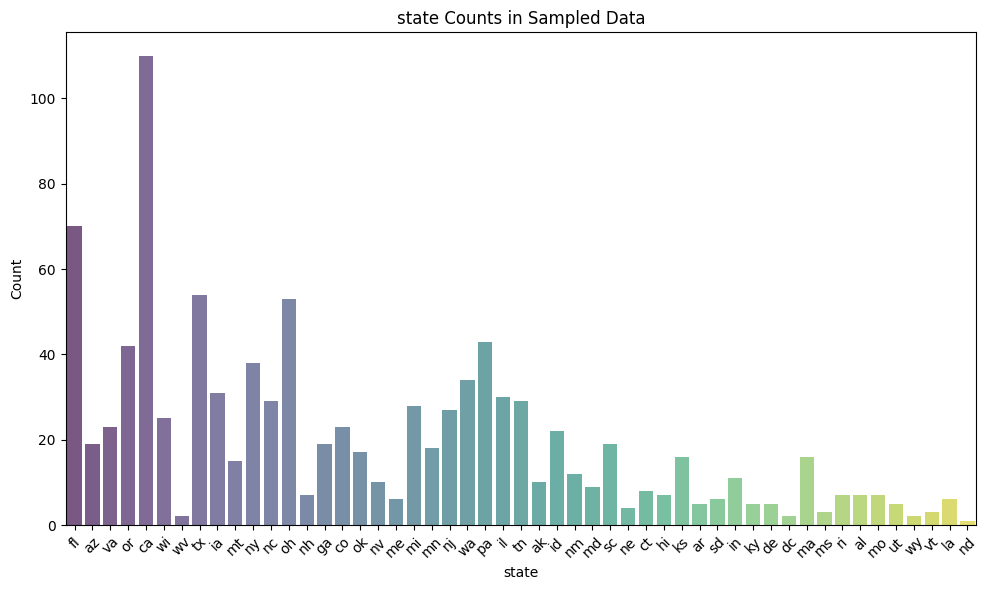


Description:
The count plot displays the distribution of the 'state' attribute in the sampled data.
Each bar represents the count of occurrences for each category in the attribute, providing insights into its distribution.

Value Counts:
state
ca    110
fl     70
tx     54
oh     53
pa     43
or     42
ny     38
wa     34
ia     31
il     30
nc     29
tn     29
mi     28
nj     27
wi     25
co     23
va     23
id     22
ga     19
sc     19
az     19
mn     18
ok     17
ma     16
ks     16
mt     15
nm     12
in     11
ak     10
nv     10
md      9
ct      8
al      7
mo      7
ri      7
hi      7
nh      7
me      6
sd      6
la      6
ky      5
de      5
ut      5
ar      5
ne      4
ms      3
vt      3
dc      2
wy      2
wv      2
nd      1
Name: count, dtype: int64
--------------------------------------------------


In [24]:
# Randomly sample 1000 data points for visualization
sampled_data = final_train_data.sample(1000)

# Create count plots for sampled categorical columns
categorical_columns_sampled = sampled_data.select_dtypes(include=[object]).columns

for i, col in enumerate(categorical_columns_sampled):
    plt.figure(figsize=(10, 6))  # Increase the figure size
    sns.countplot(x=col, data=sampled_data, palette='viridis', alpha=0.7)
    plt.title(f"{col} Counts in Sampled Data")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

    # Print description
    print("\nDescription:")
    print(f"The count plot displays the distribution of the '{col}' attribute in the sampled data.")
    print("Each bar represents the count of occurrences for each category in the attribute, providing insights "
          "into its distribution.")
    print("\nValue Counts:")
    print(sampled_data[col].value_counts())
    print("-" * 50)

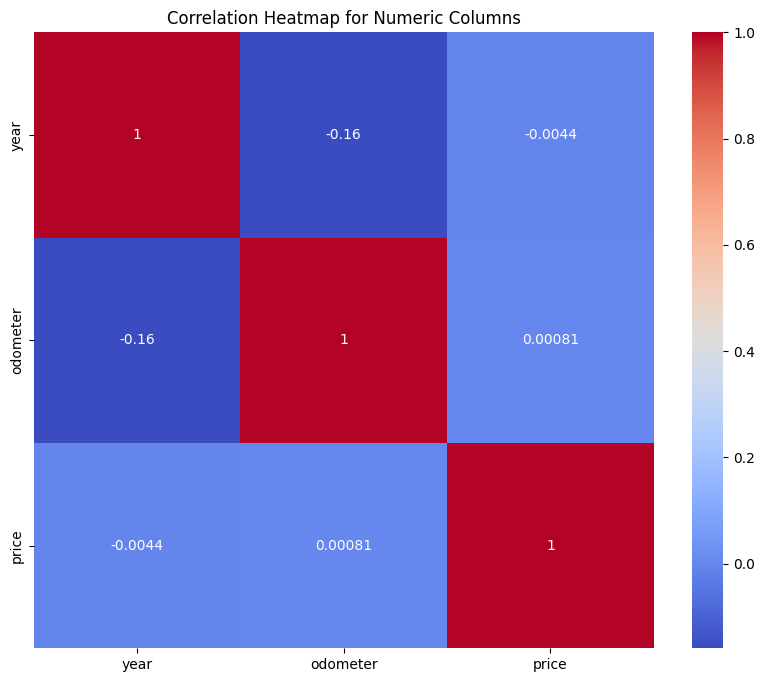


Correlation Results:
Correlation between year and odometer: -0.16
Correlation between year and price: -0.00
Correlation between odometer and year: -0.16
Correlation between odometer and price: 0.00
Correlation between price and year: -0.00
Correlation between price and odometer: 0.00


In [29]:
# 4.2 Correlation Heatmap
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
numeric_columns = combined_data.select_dtypes(include=np.number).columns
correlation_matrix = combined_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

# Print correlation results information
print("\nCorrelation Results:")
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            corr_value = correlation_matrix.loc[col1, col2]
            print(f"Correlation between {col1} and {col2}: {corr_value:.2f}")


## Correlation Interpretation

Let's interpret the specific correlation results:

1. Correlation between year and odometer: -0.16
   - This indicates a weak negative correlation between the manufacturing year of the car and its odometer reading. It suggests that, on average, newer cars tend to have lower odometer readings.

2. Correlation between year and price: -0.00
   - This indicates a very weak or almost no linear relationship between the manufacturing year of the car and its price. It means that the year of manufacture has little to no impact on the car's price.

3. Correlation between odometer and year: -0.16
   - This is the same correlation as the first one but displayed in the opposite order. It confirms the weak negative correlation between the car's odometer reading and its manufacturing year.

4. Correlation between odometer and price: 0.00
   - This indicates a very weak or no linear relationship between the car's odometer reading and its price. It means that the mileage of the car does not significantly impact its price.

5. Correlation between price and year: -0.00
   - This is the same correlation as the second one but displayed in the opposite order. It confirms that there is little to no linear relationship between the car's price and its manufacturing year.

6. Correlation between price and odometer: 0.00
   - This is the same correlation as the fourth one but displayed in the opposite order. It confirms that there is little to no linear relationship between the car's price and its odometer reading.


# 5. Multi-variate Data Analysis


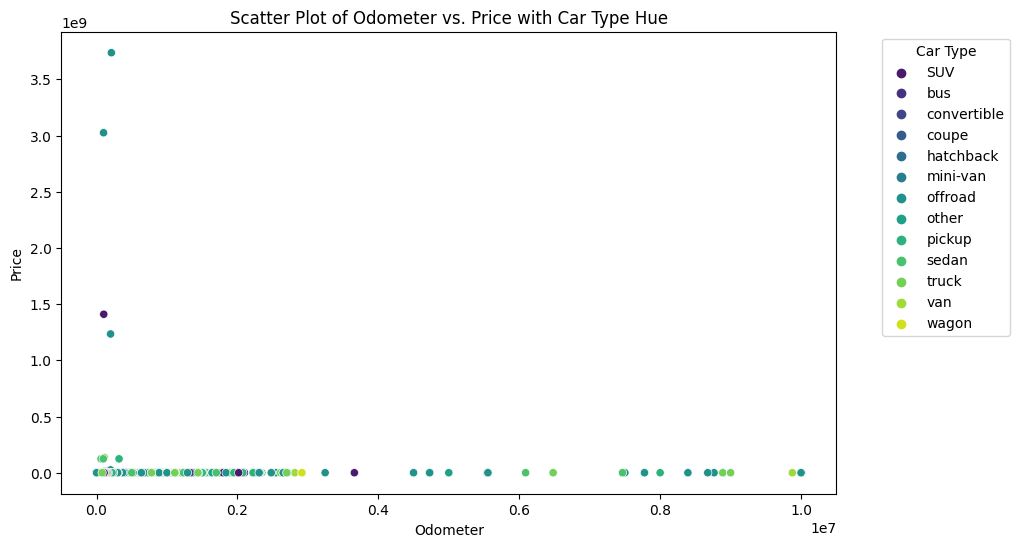

Summary Statistics for Odometer:
count    4.144700e+05
mean     9.766145e+04
std      2.050327e+05
min      0.000000e+00
25%      3.800000e+04
50%      8.566200e+04
75%      1.335190e+05
max      1.000000e+07
Name: odometer, dtype: float64

Summary Statistics for Price:
count    2.901290e+05
mean     5.193300e+04
std      9.591680e+06
min      0.000000e+00
25%      5.991000e+03
50%      1.399000e+04
75%      2.650000e+04
max      3.736929e+09
Name: price, dtype: float64


In [30]:
# 5.1 Scatter Plots with Hue
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', hue='type', data=combined_data, palette='viridis')
plt.title("Scatter Plot of Odometer vs. Price with Car Type Hue")
plt.xlabel("Odometer")
plt.ylabel("Price")
plt.legend(title='Car Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Summary statistics for odometer and price columns
odometer_stats = combined_data['odometer'].describe()
price_stats = combined_data['price'].describe()

# Print the summary statistics
print("Summary Statistics for Odometer:")
print(odometer_stats)
print("\nSummary Statistics for Price:")
print(price_stats)

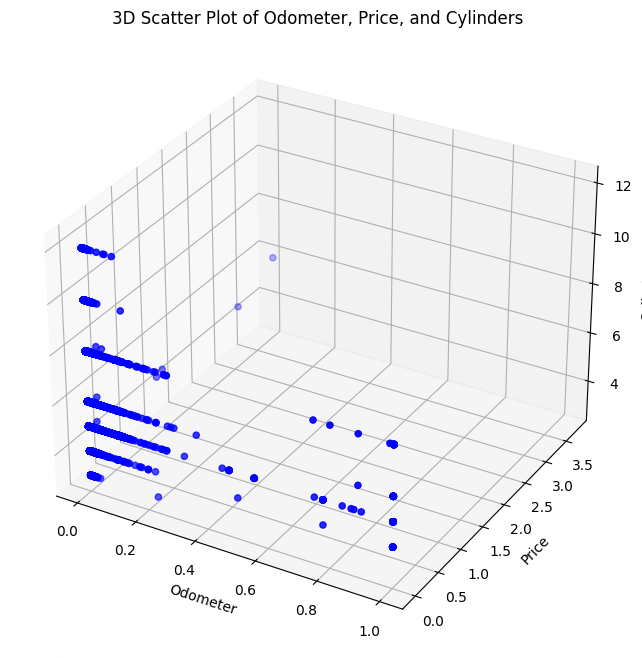


Insights:
The 3D scatter plot provides a visual representation of the relationships between three numeric attributes: 'Odometer', 'Price', and 'Cylinders'.
Each data point in the plot corresponds to a car in the dataset.

- Odometer:
  - Minimum value: 0.0
  - Maximum value: 10000000.0
  - Mean value: 97661.45046927402
  - Median value: 85662.0
  - Standard deviation: 205032.67103817099

- Price:
  - Minimum value: 0.0
  - Maximum value: 3736928711.0
  - Mean value: 51933.00218523484
  - Median value: 13990.0
  - Standard deviation: 9591680.312831767

- Cylinders:
  - Minimum value: 3.0
  - Maximum value: 12.0
  - Mean value: 6.433910270678292
  - Median value: 6.0
  - Standard deviation: 2.46576223909341


In [22]:
# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data['odometer'], combined_data['price'], combined_data['cylinders'], c='blue', marker='o')
ax.set_xlabel('Odometer')
ax.set_ylabel('Price')
ax.set_zlabel('Cylinders')
plt.title("3D Scatter Plot of Odometer, Price, and Cylinders")
plt.show()

# Print the insights of this graph
print("\nInsights:")
print("The 3D scatter plot provides a visual representation of the relationships between three numeric attributes: 'Odometer', 'Price', and 'Cylinders'.")
print("Each data point in the plot corresponds to a car in the dataset.")
print("\n- Odometer:")
print("  - Minimum value:", combined_data['odometer'].min())
print("  - Maximum value:", combined_data['odometer'].max())
print("  - Mean value:", combined_data['odometer'].mean())
print("  - Median value:", combined_data['odometer'].median())
print("  - Standard deviation:", combined_data['odometer'].std())
print("\n- Price:")
print("  - Minimum value:", combined_data['price'].min())
print("  - Maximum value:", combined_data['price'].max())
print("  - Mean value:", combined_data['price'].mean())
print("  - Median value:", combined_data['price'].median())
print("  - Standard deviation:", combined_data['price'].std())
print("\n- Cylinders:")
print("  - Minimum value:", combined_data['cylinders'].min())
print("  - Maximum value:", combined_data['cylinders'].max())
print("  - Mean value:", combined_data['cylinders'].mean())
print("  - Median value:", combined_data['cylinders'].median())
print("  - Standard deviation:", combined_data['cylinders'].std())
